In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils.weather_data_util import get_station_locations, get_location_lists
from utils.weather_data_util import find_nearst_meo_station_name, get_related_meo_dfs
from utils.data_util import load_bj_aq_data

%matplotlib inline

In [15]:
# 网格气象数据
ld_grid_meo_all = pd.read_csv("./KDD_CUP_2018/London/grid_meo/London_historical_meo_grid.csv")
# 空气质量站点的经纬度
aq_station_locations = pd.read_csv("./KDD_CUP_2018/London/location/London_AirQuality_Stations.csv")

In [18]:
aq_station_locations.rename(index=str, columns={"Unnamed: 0":"stationName", "Longitude":"longitude", "Latitude":"latitude"}, inplace=True)

### 1. 站点位置

In [19]:
ld_grid_meo = ld_grid_meo_all.head(861)  # 因为一共只有 651 个 grid

grid_meo_locations = get_station_locations(ld_grid_meo)
aq_locations = get_station_locations(aq_station_locations)

print("There are %d grid meo stations in London." %(len(grid_meo_locations)))
print("There are %d air quality stations in London." %(len(aq_locations)))

There are 861 grid meo stations in London.
There are 24 air quality stations in London.


In [20]:
grid_meo_locations_longitudes, grid_meo_locations_latitudes = get_location_lists(grid_meo_locations)
aq_locations_longitudes, aq_locations_latitudes = get_location_lists(aq_locations)

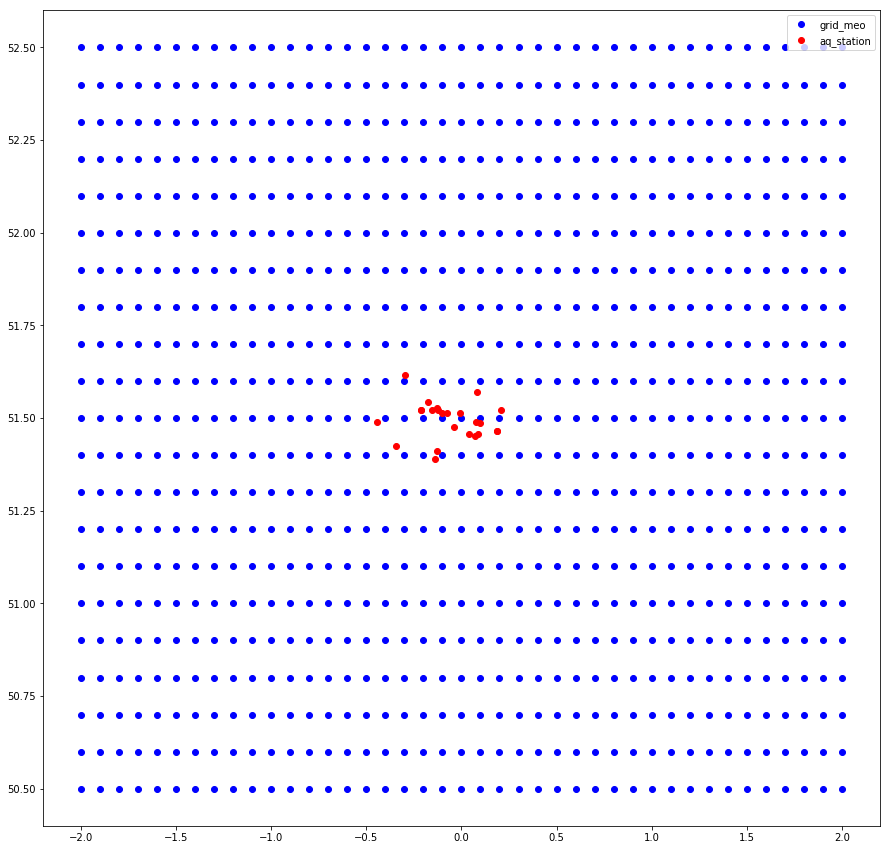

In [21]:
plt.rc("figure", figsize=(15,15));
plt.plot(grid_meo_locations_longitudes, grid_meo_locations_latitudes, "bo", label="grid_meo");
plt.plot(aq_locations_longitudes, aq_locations_latitudes, "ro", label="aq_station");
plt.legend();

### 2. 距离空气质量站点最近的天气站点

In [22]:
aq_station_nearest_meo_station = {}

# 暂时只使用 网格气象数据
# stations = meo_locations + grid_meo_locations
stations = grid_meo_locations

for aq_station in aq_locations:
    nearest_meo_station_name = find_nearst_meo_station_name(aq_station, stations)
    aq_station_nearest_meo_station[aq_station[0]] = nearest_meo_station_name

In [23]:
# 空气质量站点 与 天气站点
aq_station_nearest_meo_station

{'BL0': 'london_grid_409',
 'BX1': 'london_grid_472',
 'BX9': 'london_grid_472',
 'CD1': 'london_grid_388',
 'CD9': 'london_grid_409',
 'CR8': 'london_grid_408',
 'CT2': 'london_grid_409',
 'CT3': 'london_grid_409',
 'GB0': 'london_grid_451',
 'GN0': 'london_grid_451',
 'GN3': 'london_grid_451',
 'GR4': 'london_grid_451',
 'GR9': 'london_grid_430',
 'HR1': 'london_grid_368',
 'HV1': 'london_grid_472',
 'KC1': 'london_grid_388',
 'KF1': 'london_grid_388',
 'LH0': 'london_grid_346',
 'LW2': 'london_grid_430',
 'MY7': 'london_grid_388',
 'RB7': 'london_grid_452',
 'ST5': 'london_grid_408',
 'TD5': 'london_grid_366',
 'TH4': 'london_grid_430'}

对于上述字典中的键对应的 aq_station，直接使用对应的 value 作为其天气数据